In [1]:
import numpy as np
import matplotlib.pyplot as plt

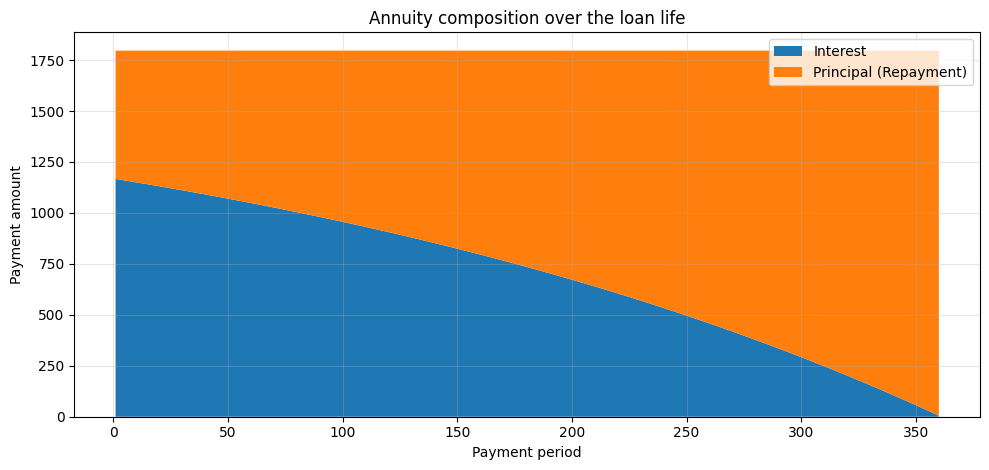

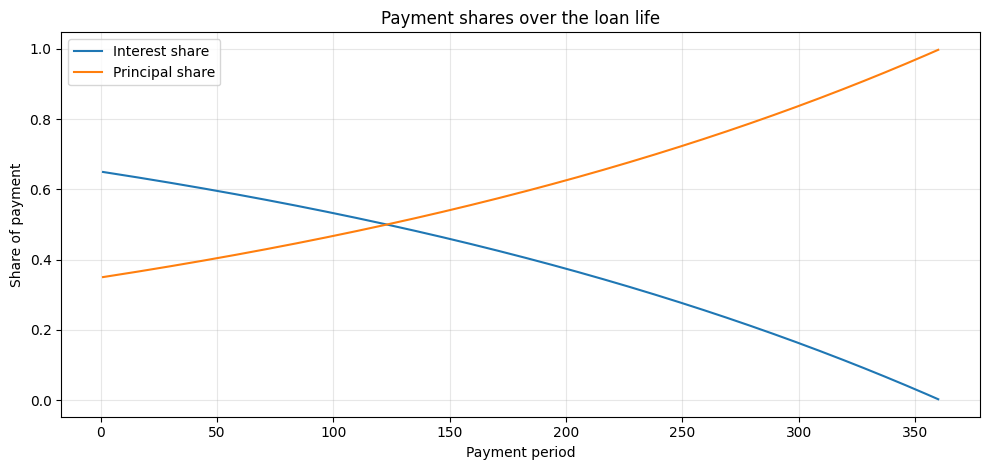

In [2]:
def amortization_schedule(
    principal: float,
    annual_rate: float,
    years: int,
    payments_per_year: int = 12,
):
    """
    Fixed-rate annuity loan amortization schedule.

    Returns:
        t: period index (1..N)
        interest: interest payment per period
        principal_pay: principal repayment per period
        balance: remaining balance after payment
        payment: constant annuity payment per period
    """
    r = annual_rate / payments_per_year
    N = years * payments_per_year

    if principal <= 0:
        raise ValueError("principal must be > 0")
    if annual_rate < 0:
        raise ValueError("annual_rate must be >= 0")
    if years <= 0 or payments_per_year <= 0:
        raise ValueError("years and payments_per_year must be > 0")

    # Constant payment (annuity)
    if r == 0:
        payment = principal / N
    else:
        payment = principal * (r * (1 + r) ** N) / ((1 + r) ** N - 1)

    interest = np.zeros(N)
    principal_pay = np.zeros(N)
    balance = np.zeros(N)

    bal = principal
    for i in range(N):
        int_i = bal * r
        prin_i = payment - int_i
        # Numerical safety in the last periods
        if prin_i > bal:
            prin_i = bal
            payment_i = int_i + prin_i
        else:
            payment_i = payment

        bal = bal - prin_i

        interest[i] = int_i
        principal_pay[i] = prin_i
        balance[i] = bal

    t = np.arange(1, N + 1)
    return t, interest, principal_pay, balance, payment

# --- Example parameters (replace with your calibration) ---
principal = 400_000     # loan amount
annual_rate = 0.035     # 3.5% p.a.
years = 30
payments_per_year = 12

t, interest, principal_pay, balance, payment = amortization_schedule(
    principal, annual_rate, years, payments_per_year
)

# --- Plot 1: Composition of constant annuity payment (stacked area) ---
plt.figure(figsize=(10, 4.8))
plt.stackplot(t, interest, principal_pay, labels=["Interest", "Principal (Repayment)"])
plt.title("Annuity composition over the loan life")
plt.xlabel("Payment period")
plt.ylabel("Payment amount")
plt.legend(loc="upper right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("annuity_composition.pdf")   # thesis-friendly (vector)
plt.savefig("annuity_composition.png", dpi=300)
plt.show()

# --- Optional Plot 2: Shares (interest share declines, principal share rises) ---
share_interest = interest / (interest + principal_pay)
share_principal = principal_pay / (interest + principal_pay)

plt.figure(figsize=(10, 4.8))
plt.plot(t, share_interest, label="Interest share")
plt.plot(t, share_principal, label="Principal share")
plt.title("Payment shares over the loan life")
plt.xlabel("Payment period")
plt.ylabel("Share of payment")
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("annuity_shares.pdf")
plt.savefig("annuity_shares.png", dpi=300)
plt.show()
